### Data analysis phase

In [104]:
import numpy as np
import pandas as pd

pd.pandas.set_option('Display.max_columns', None)

In [105]:
dataset=pd.read_csv('salary,satisfaction.csv')

dataset.head()

,id,Target_Salary,Target_Satisfied,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,To Apply,Hours/Shift,Residency Requirement,Posting Date,Posting Updated,Process Date,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,HopeFiveYears,JobSearchStatus,LastNewJob,UpdateCV,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,Methodology,VersionControl,CheckInCode,AIDangerous,AIInteresting,AIResponsible,AIFuture,Age,term,loan_status,pymnt_plan,orignal_website_directory,purpose,title,zip_code,addr_state,dti,earliest_cr_line,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,Time,emp_length,your_favoritearticle_today,url,Email,homeaddress,latitude,longitude,PHONE,officeaddress,website,dateAdded,previousaddress,phones,CrimeTime
0,68407277,42405.00,0,"$3,600.00",Account Manager,CONTRACT REVIEWER (OFFICE OF L,Strategy & Analytics,Division of Economic & Financial Opportunity (...,1.\tA baccalaureate degree from an accredited ...,•\tExcellent interpersonal and organizational ...,"Salary range for this position is: $42,405 - $...",NaN,NaN,New York City residency is generally required ...,2011-06-24T00:00:00.000,2011-06-24T00:00:00.000,2019-12-17T00:00:00.000,"Bachelor�s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Working as a founder or co-founder of my own c...,"I�m not actively looking, but I am open to new...",Less than a year ago,My job status or other personal status changed,Slack,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,To build my professional network,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,Agile;Scrum,Git,Multiple times per day,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,25 - 34 years old,36 months,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,190xx,PA,5.91,3-Aug,19-Jan,122.67,NaN,19-Mar,3/22/2016 9:51,< 1 year,https://www.reuters.com/article/us-tesla-crash...,nobell.it/70ffb52d079109dca5664cce6f317373782/...,mstephenson@fernandez.com,"346 W Magnolia Ave Auburn, AL 36832 US",32.606813,-85.487328,(91) 555 22 82,"PO Box 4653, Stockton, California, 95204",http://www.valleybrew.com/,2016-04-22T02:47:48Z,1045 San Pablo Ave,(510) 528-2375,23:30:00
1,68355089,60740.00,1,"$24,700.00","EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,Tech Talent Pipeline,The New York City Department of Small Business...,1. A baccalaureate degree from an accredited c...,NaN,NaN,"In addition to applying through this website, ...",NaN,New York City residency is generally required ...,2012-01-26T00:00:00.000,2012-01-26T00:00:00.000,2019-12-17T00:00:00.000,"Bachelor�s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,18-20 years,Working in a different or more specialized tec...,I am actively looking for a job,More than 4 years ago,I saw an employer�s advertisement,Confluence;Office / productivity suite (Micros...,One to three months,"Taught yourself a new language, framewo

In [106]:
dataset.shape

(2946, 83)

In [107]:
##missing values
feature_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1]
for feature in feature_with_nan:
    print(feature, np.round(dataset[feature].isnull().mean(), 4), "% is missing values")

Minimum Qual Requirements 0.0068 % is missing values
Preferred Skills 0.1334 % is missing values
Additional Information 0.3707 % is missing values
Hours/Shift 0.6999 % is missing values
Residency Requirement 0.0014 % is missing values
Posting Date 0.0014 % is missing values
Posting Updated 0.0014 % is missing values
Process Date 0.0014 % is missing values
FormalEducation 0.0177 % is missing values
UndergradMajor 0.1093 % is missing values
DevType 0.0153 % is missing values
YearsCoding 0.001 % is missing values
YearsCodingProf 0.1385 % is missing values
HopeFiveYears 0.1592 % is missing values
JobSearchStatus 0.1477 % is missing values
LastNewJob 0.1517 % is missing values
UpdateCV 0.2909 % is missing values
CommunicationTools 0.3133 % is missing values
TimeFullyProductive 0.3035 % is missing values
EducationTypes 0.2777 % is missing values
SelfTaughtTypes 0.3849 % is missing values
TimeAfterBootcamp 0.925 % is missing values
HackathonReasons 0.7118 % is missing values
AgreeDisagree1 0.

In [108]:
print("total couunt of Id {}".format(len(dataset.id)))

total couunt of Id 2946


In [109]:
##gathering how many feature are present in the variuse categori of feature  
numerical_feature=[feature for feature in dataset.columns if dataset[feature].dtype != 'O']
discrete_feature=[feature for feature in numerical_feature if len(dataset[feature].unique())<25]
continues_feature=[feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature=[feature for feature in dataset.columns if feature not in numerical_feature]

print("total count of numerical feature = {}".format(len(numerical_feature)))
print("total count of discreate feature = {}".format(len(discrete_feature)))
print("total count of continues feature = {}".format(len(continues_feature)))
print("total count of categorical feature = {}".format(len(categorical_feature)))


total count of numerical feature = 7
total count of discreate feature = 1
total count of continues feature = 6
total count of categorical feature = 76


In [110]:
print(numerical_feature)
print(continues_feature)
print(discrete_feature)


['id', 'Target_Salary', 'Target_Satisfied', 'dti', 'last_pymnt_amnt', 'latitude', 'longitude']
['id', 'Target_Salary', 'dti', 'last_pymnt_amnt', 'latitude', 'longitude']
['Target_Satisfied']


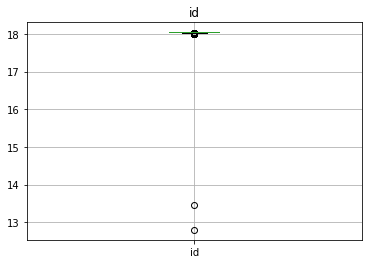

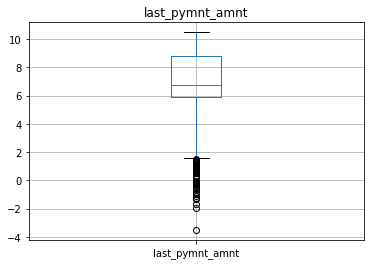

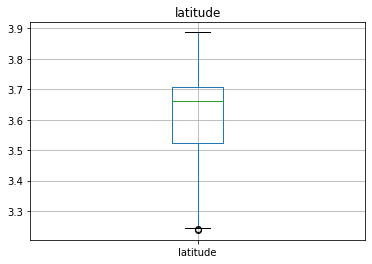

C:\Users\swapn\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


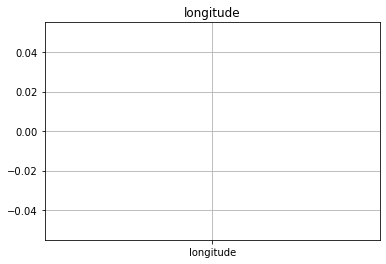

In [111]:
import matplotlib.pyplot as plt
for feature in continues_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.xlabel=(feature)
        plt.ylabel=('Target_Salary')
        plt.title(feature)
        plt.show()
                    

In [112]:
print(categorical_feature)

['LOAN_AMT', 'Business Title', 'Civil Service Title', 'Division/Work Unit', 'Job Description', 'Minimum Qual Requirements', 'Preferred Skills', 'Additional Information', 'To Apply', 'Hours/Shift', 'Residency Requirement', 'Posting Date', 'Posting Updated', 'Process Date', 'FormalEducation', 'UndergradMajor', 'CompanySize', 'DevType', 'YearsCoding', 'YearsCodingProf', 'HopeFiveYears', 'JobSearchStatus', 'LastNewJob', 'UpdateCV', 'CommunicationTools', 'TimeFullyProductive', 'EducationTypes', 'SelfTaughtTypes', 'TimeAfterBootcamp', 'HackathonReasons', 'AgreeDisagree1', 'AgreeDisagree2', 'AgreeDisagree3', 'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith', 'PlatformDesireNextYear', 'FrameworkWorkedWith', 'FrameworkDesireNextYear', 'IDE', 'OperatingSystem', 'Methodology', 'VersionControl', 'CheckInCode', 'AIDangerous', 'AIInteresting', 'AIResponsible', 'AIFuture', 'Age', 'term', 'loan_status', 'pymnt_plan', 'orignal_website_d

In [113]:
dataset[categorical_feature]

,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,To Apply,Hours/Shift,Residency Requirement,Posting Date,Posting Updated,Process Date,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,HopeFiveYears,JobSearchStatus,LastNewJob,UpdateCV,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,Methodology,VersionControl,CheckInCode,AIDangerous,AIInteresting,AIResponsible,AIFuture,Age,term,loan_status,pymnt_plan,orignal_website_directory,purpose,title,zip_code,addr_state,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d,Time,emp_length,your_favoritearticle_today,url,Email,homeaddress,PHONE,officeaddress,website,dateAdded,previousaddress,phones,CrimeTime
0,"$3,600.00",Account Manager,CONTRACT REVIEWER (OFFICE OF L,Strategy & Analytics,Division of Economic & Financial Opportunity (...,1.\tA baccalaureate degree from an accredited ...,•\tExcellent interpersonal and organizational ...,"Salary range for this position is: $42,405 - $...",NaN,NaN,New York City residency is generally required ...,2011-06-24T00:00:00.000,2011-06-24T00:00:00.000,2019-12-17T00:00:00.000,"Bachelor�s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Working as a founder or co-founder of my own c...,"I�m not actively looking, but I am open to new...",Less than a year ago,My job status or other personal status changed,Slack,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,To build my professional network,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,Agile;Scrum,Git,Multiple times per day,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,25 - 34 years old,36 months,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,190xx,PA,3-Aug,19-Jan,NaN,19-Mar,3/22/2016 9:51,< 1 year,https://www.reuters.com/article/us-tesla-crash...,nobell.it/70ffb52d079109dca5664cce6f317373782/...,mstephenson@fernandez.com,"346 W Magnolia Ave Auburn, AL 36832 US",(91) 555 22 82,"PO Box 4653, Stockton, California, 95204",http://www.valleybrew.com/,2016-04-22T02:47:48Z,1045 San Pablo Ave,(510) 528-2375,23:30:00
1,"$24,700.00","EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,Tech Talent Pipeline,The New York City Department of Small Business...,1. A baccalaureate degree from an accredited c...,NaN,NaN,"In addition to applying through this website, ...",NaN,New York City residency is generally required ...,2012-01-26T00:00:00.000,2012-01-26T00:00:00.000,2019-12-17T00:00:00.000,"Bachelor�s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,18-20 years,Working in a different or more specialized tec...,I am actively looking for a job,More than 4 years ago,I saw an employer�s advertisement,Confluence;Office / productivity suite (Micros...,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,NaN,Agree,Agree,Neither Agree nor Disagree,JavaScript;Python;Bash/Shell,Go;Pytho

In [114]:
##find the how many unique values are present in categorical feature 
for feature in categorical_feature:
    print('The feature is {} and total count is {}'.format(feature, len(dataset[feature].unique())))

The feature is LOAN_AMT and total count is 492
The feature is Business Title and total count is 1244
The feature is Civil Service Title and total count is 312
The feature is Division/Work Unit and total count is 678
The feature is Job Description and total count is 1608
The feature is Minimum Qual Requirements and total count is 337
The feature is Preferred Skills and total count is 1283
The feature is Additional Information and total count is 682
The feature is To Apply and total count is 894
The feature is Hours/Shift and total count is 182
The feature is Residency Requirement and total count is 51
The feature is Posting Date and total count is 494
The feature is Posting Updated and total count is 488
The feature is Process Date and total count is 2
The feature is FormalEducation and total count is 10
The feature is UndergradMajor and total count is 13
The feature is CompanySize and total count is 8
The feature is DevType and total count is 811
The feature is YearsCoding and total co

### feature engineering phase

In [115]:
##handiling missing values in categorical feature 
for feature in categorical_feature:
    print(feature, np.round(dataset[feature].isnull().mean(), 2), "% of missing values are present")


LOAN_AMT 0.0 % of missing values are present
Business Title 0.0 % of missing values are present
Civil Service Title 0.0 % of missing values are present
Division/Work Unit 0.0 % of missing values are present
Job Description 0.0 % of missing values are present
Minimum Qual Requirements 0.01 % of missing values are present
Preferred Skills 0.13 % of missing values are present
Additional Information 0.37 % of missing values are present
To Apply 0.0 % of missing values are present
Hours/Shift 0.7 % of missing values are present
Residency Requirement 0.0 % of missing values are present
Posting Date 0.0 % of missing values are present
Posting Updated 0.0 % of missing values are present
Process Date 0.0 % of missing values are present
FormalEducation 0.02 % of missing values are present
UndergradMajor 0.11 % of missing values are present
CompanySize 0.0 % of missing values are present
DevType 0.02 % of missing values are present
YearsCoding 0.0 % of missing values are present
YearsCodingProf 0

In [116]:
def categorical_nan(dataset, categorical_feature):
    data=dataset.copy()
    data[categorical_feature]=data[categorical_feature].fillna('missing')
    return data
dataset=categorical_nan(dataset, categorical_feature)
dataset[categorical_feature].isnull().sum()

LOAN_AMT               0
Business Title         0
Civil Service Title    0
Division/Work Unit     0
Job Description        0
                      ..
website                0
dateAdded              0
previousaddress        0
phones                 0
CrimeTime              0
Length: 76, dtype: int64

In [117]:
print(numerical_feature)

['id', 'Target_Salary', 'Target_Satisfied', 'dti', 'last_pymnt_amnt', 'latitude', 'longitude']


In [118]:
numerical_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtype !='O']
for feature in numerical_nan:
    print("{}: {} % of missing values are present the numerical dataset".format(feature, np.round(dataset[feature].isnull().mean(), 4)))

dataset[numerical_nan].head()

latitude: 0.1076 % of missing values are present the numerical dataset
longitude: 0.1076 % of missing values are present the numerical dataset


,latitude,longitude
0,32.606813,-85.487328
1,33.509721,-86.802756
2,33.595581,-86.647437
3,33.422582,-86.698279
4,34.154134,-86.841220


In [119]:
for feature in numerical_nan:
    
    #we replace by using median since we have lot of outliers 
    median_val=dataset[feature].median()
    
    dataset[feature+'_nan']=np.where(dataset[feature].isnull(), 1, 0)
    dataset[feature].fillna(median_val, inplace=True)

dataset[numerical_nan].isnull().sum()

latitude     0
longitude    0
dtype: int64

In [120]:
dataset[numerical_nan].head()

,latitude,longitude
0,32.606813,-85.487328
1,33.509721,-86.802756
2,33.595581,-86.647437
3,33.422582,-86.698279
4,34.154134,-86.841220


In [121]:
dataset[numerical_nan].head()

,latitude,longitude
0,32.606813,-85.487328
1,33.509721,-86.802756
2,33.595581,-86.647437
3,33.422582,-86.698279
4,34.154134,-86.841220


In [122]:
dataset.head()

,id,Target_Salary,Target_Satisfied,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,To Apply,Hours/Shift,Residency Requirement,Posting Date,Posting Updated,Process Date,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,HopeFiveYears,JobSearchStatus,LastNewJob,UpdateCV,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,Methodology,VersionControl,CheckInCode,AIDangerous,AIInteresting,AIResponsible,AIFuture,Age,term,loan_status,pymnt_plan,orignal_website_directory,purpose,title,zip_code,addr_state,dti,earliest_cr_line,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,Time,emp_length,your_favoritearticle_today,url,Email,homeaddress,latitude,longitude,PHONE,officeaddress,website,dateAdded,previousaddress,phones,CrimeTime,latitude_nan,longitude_nan
0,68407277,42405.00,0,"$3,600.00",Account Manager,CONTRACT REVIEWER (OFFICE OF L,Strategy & Analytics,Division of Economic & Financial Opportunity (...,1.\tA baccalaureate degree from an accredited ...,•\tExcellent interpersonal and organizational ...,"Salary range for this position is: $42,405 - $...",missing,missing,New York City residency is generally required ...,2011-06-24T00:00:00.000,2011-06-24T00:00:00.000,2019-12-17T00:00:00.000,"Bachelor�s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Working as a founder or co-founder of my own c...,"I�m not actively looking, but I am open to new...",Less than a year ago,My job status or other personal status changed,Slack,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,missing,To build my professional network,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,Agile;Scrum,Git,Multiple times per day,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,25 - 34 years old,36 months,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,190xx,PA,5.91,3-Aug,19-Jan,122.67,missing,19-Mar,3/22/2016 9:51,< 1 year,https://www.reuters.com/article/us-tesla-crash...,nobell.it/70ffb52d079109dca5664cce6f317373782/...,mstephenson@fernandez.com,"346 W Magnolia Ave Auburn, AL 36832 US",32.606813,-85.487328,(91) 555 22 82,"PO Box 4653, Stockton, California, 95204",http://www.valleybrew.com/,2016-04-22T02:47:48Z,1045 San Pablo Ave,(510) 528-2375,23:30:00,0,0
1,68355089,60740.00,1,"$24,700.00","EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,Tech Talent Pipeline,The New York City Department of Small Business...,1. A baccalaureate degree from an accredited c...,missing,missing,"In addition to applying through this website, ...",missing,New York City residency is generally required ...,2012-01-26T00:00:00.000,2012-01-26T00:00:00.000,2019-12-17T00:00:00.000,"Bachelor�s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,18-20 years,Working in a different or more specialized tec...,I am actively looking for a job,More than 4 years ago,I saw an employer�s advertisement,Confluence;Office / productivity suite (Micros...,O

In [123]:
for feature in continues_feature:
    IQR=dataset[feature].quantile(0.75)-dataset[feature].quantile(0.25)
    lower_bridge=dataset[feature].quantile(0.25)-(IQR*1.5)
    upper_bridge=dataset[feature].quantile(0.75)+(IQR*1.5)
    print("{} = {}, {}".format(feature, lower_bridge, upper_bridge))

id = 68134094.125, 68779767.125
Target_Salary = 13717.375, 108844.375
dti = -5.782499999999995, 44.397499999999994
last_pymnt_amnt = -9340.8275, 16535.9925
latitude = 24.053831331250002, 50.73371552125
longitude = -126.20811899750001, -52.53631411749999


- for continues feature, I write above code to convert continues feature into dicreate feature but value is to high and i think without converting the into dicreate feature, model will predict well.

### handling rare var
- when we find the unique feature in above code, We obsserve that there are some rare variable which is less that 1% we convert this into rare variable 

In [124]:
cate_feature=[feature for feature in dataset.columns if dataset[feature].dtype=="O"]
print(cate_feature)

['LOAN_AMT', 'Business Title', 'Civil Service Title', 'Division/Work Unit', 'Job Description', 'Minimum Qual Requirements', 'Preferred Skills', 'Additional Information', 'To Apply', 'Hours/Shift', 'Residency Requirement', 'Posting Date', 'Posting Updated', 'Process Date', 'FormalEducation', 'UndergradMajor', 'CompanySize', 'DevType', 'YearsCoding', 'YearsCodingProf', 'HopeFiveYears', 'JobSearchStatus', 'LastNewJob', 'UpdateCV', 'CommunicationTools', 'TimeFullyProductive', 'EducationTypes', 'SelfTaughtTypes', 'TimeAfterBootcamp', 'HackathonReasons', 'AgreeDisagree1', 'AgreeDisagree2', 'AgreeDisagree3', 'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith', 'PlatformDesireNextYear', 'FrameworkWorkedWith', 'FrameworkDesireNextYear', 'IDE', 'OperatingSystem', 'Methodology', 'VersionControl', 'CheckInCode', 'AIDangerous', 'AIInteresting', 'AIResponsible', 'AIFuture', 'Age', 'term', 'loan_status', 'pymnt_plan', 'orignal_website_d

In [125]:
for feature in cate_feature:
    temp=dataset.groupby(feature)['Target_Satisfied'].count()/len(dataset)
    temp_df=temp[temp>0.0001].index
    dataset[feature]=np.where(dataset[feature].isin(temp_df), dataset[feature], 'Rare_var')

In [126]:
dataset.head()

,id,Target_Salary,Target_Satisfied,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,To Apply,Hours/Shift,Residency Requirement,Posting Date,Posting Updated,Process Date,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,HopeFiveYears,JobSearchStatus,LastNewJob,UpdateCV,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,Methodology,VersionControl,CheckInCode,AIDangerous,AIInteresting,AIResponsible,AIFuture,Age,term,loan_status,pymnt_plan,orignal_website_directory,purpose,title,zip_code,addr_state,dti,earliest_cr_line,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,Time,emp_length,your_favoritearticle_today,url,Email,homeaddress,latitude,longitude,PHONE,officeaddress,website,dateAdded,previousaddress,phones,CrimeTime,latitude_nan,longitude_nan
0,68407277,42405.00,0,"$3,600.00",Account Manager,CONTRACT REVIEWER (OFFICE OF L,Strategy & Analytics,Division of Economic & Financial Opportunity (...,1.\tA baccalaureate degree from an accredited ...,•\tExcellent interpersonal and organizational ...,"Salary range for this position is: $42,405 - $...",missing,missing,New York City residency is generally required ...,2011-06-24T00:00:00.000,2011-06-24T00:00:00.000,2019-12-17T00:00:00.000,"Bachelor�s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Working as a founder or co-founder of my own c...,"I�m not actively looking, but I am open to new...",Less than a year ago,My job status or other personal status changed,Slack,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,missing,To build my professional network,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,Agile;Scrum,Git,Multiple times per day,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,25 - 34 years old,36 months,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,190xx,PA,5.91,3-Aug,19-Jan,122.67,missing,19-Mar,3/22/2016 9:51,< 1 year,https://www.reuters.com/article/us-tesla-crash...,nobell.it/70ffb52d079109dca5664cce6f317373782/...,mstephenson@fernandez.com,"346 W Magnolia Ave Auburn, AL 36832 US",32.606813,-85.487328,(91) 555 22 82,"PO Box 4653, Stockton, California, 95204",http://www.valleybrew.com/,2016-04-22T02:47:48Z,1045 San Pablo Ave,(510) 528-2375,23:30:00,0,0
1,68355089,60740.00,1,"$24,700.00","EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,Tech Talent Pipeline,The New York City Department of Small Business...,1. A baccalaureate degree from an accredited c...,missing,missing,"In addition to applying through this website, ...",missing,New York City residency is generally required ...,2012-01-26T00:00:00.000,2012-01-26T00:00:00.000,2019-12-17T00:00:00.000,"Bachelor�s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,18-20 years,Working in a different or more specialized tec...,I am actively looking for a job,More than 4 years ago,I saw an employer�s advertisement,Confluence;Office / productivity suite (Micros...,O

In [127]:
#conver Categorical feature into numerical feature

for feature in cate_feature:
    labels_ordered=dataset.groupby([feature])['Target_Satisfied'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    dataset[feature]=dataset[feature].map(labels_ordered)

In [128]:
dataset.head()

,id,Target_Salary,Target_Satisfied,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,To Apply,Hours/Shift,Residency Requirement,Posting Date,Posting Updated,Process Date,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,HopeFiveYears,JobSearchStatus,LastNewJob,UpdateCV,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,Methodology,VersionControl,CheckInCode,AIDangerous,AIInteresting,AIResponsible,AIFuture,Age,term,loan_status,pymnt_plan,orignal_website_directory,purpose,title,zip_code,addr_state,dti,earliest_cr_line,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,Time,emp_length,your_favoritearticle_today,url,Email,homeaddress,latitude,longitude,PHONE,officeaddress,website,dateAdded,previousaddress,phones,CrimeTime,latitude_nan,longitude_nan
0,68407277,42405.00,0,347,753,43,53,830,123,329,238,238,107,30,0,0,0,3,3,1,581,2,9,6,3,1,3,190,1,145,148,5,41,1,2,4,1187,1208,186,76,351,434,124,281,28,1,94,30,0,4,2,2,1,5,1,2,0,1931,3,4,398,23,5.91,300,22,122.67,1,21,218,11,933,447,143,450,32.606813,-85.487328,24,648,1044,36,46,44,492,0,0
1,68355089,60740.00,1,431,1198,164,676,1587,182,833,449,841,107,30,469,471,0,3,6,5,691,7,10,4,1,4,1,297,1,173,150,5,55,3,5,4,1341,1214,653,597,577,692,139,236,573,1,97,34,3,1,0,2,1,3,1,2,0,2737,8,9,562,46,16.06,351,36,926.35,1,21,481,8,2729,2859,1602,2184,33.509721,-86.802756,16,2162,1044,36,46,44,496,0,0
2,68341763,51907.68,0,323,79,166,170,440,176,635,351,587,107,31,234,218,0,9,8,1,603,3,4,6,3,1,5,218,3,164,149,5,55,2,3,3,1190,1218,507,609,551,701,147,241,598,2,97,32,1,3,1,0,0,2,0,2,0,1603,4,1,381,9,10.78,198,7,15813.30,1,21,481,8,6,35,692,513,33.595581,-86.647437,16,1810,1044,36,46,44,46,0,0
3,66310712,51907.68,0,340,79,166,170,440,176,635,351,587,107,31,234,218,0,3,8,3,581,6,8,6,3,1,8,218,4,142,168,5,55,0,4,1,731,907,492,652,528,682,147,245,621,3,100,30,0,4,3,1,3,3,0,1,0,2007,3,4,348,43,17.06,1,20,829.90,0,21,481,2,1533,2283,771,259,33.422582,-86.698279,5,1285,632,36,46,44,546,0,0
4,68476807,35.00,1,405,1125,280,547,1251,300,833,529,587,107,40,434,415,0,7,8,5,729,9,6,4,3,0,3,236,4,193,158,5,55,1,5,1,1374,1369,602,783,574,768,147,241,599,3,152,35,4,2,2,2,1,4,0,2,0,2553,6,7,617,23,25.37,298,10,10128.96,1,13,481,2,2671,2700,1770,2330,34.154134,-86.841220,11,2271,1101,36,46,44,530,0,0


In [129]:
scaling_feature=[feature for feature in dataset.columns if feature not in ['id','Target_Salary', 'Target_Satisfied']]
len(scaling_feature)

82

In [130]:
print(scaling_feature)

['LOAN_AMT', 'Business Title', 'Civil Service Title', 'Division/Work Unit', 'Job Description', 'Minimum Qual Requirements', 'Preferred Skills', 'Additional Information', 'To Apply', 'Hours/Shift', 'Residency Requirement', 'Posting Date', 'Posting Updated', 'Process Date', 'FormalEducation', 'UndergradMajor', 'CompanySize', 'DevType', 'YearsCoding', 'YearsCodingProf', 'HopeFiveYears', 'JobSearchStatus', 'LastNewJob', 'UpdateCV', 'CommunicationTools', 'TimeFullyProductive', 'EducationTypes', 'SelfTaughtTypes', 'TimeAfterBootcamp', 'HackathonReasons', 'AgreeDisagree1', 'AgreeDisagree2', 'AgreeDisagree3', 'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith', 'PlatformDesireNextYear', 'FrameworkWorkedWith', 'FrameworkDesireNextYear', 'IDE', 'OperatingSystem', 'Methodology', 'VersionControl', 'CheckInCode', 'AIDangerous', 'AIInteresting', 'AIResponsible', 'AIFuture', 'Age', 'term', 'loan_status', 'pymnt_plan', 'orignal_website_d

### Data Processing

In [131]:
x=dataset.drop(['id', 'Target_Salary'],1)
y=dataset.Target_Salary

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(x, y, test_size=0.20, random_state=20)

In [133]:
from sklearn.preprocessing import StandardScaler
scaler_x=StandardScaler()
X_train=scaler_x.fit_transform(X_train)
X_test=scaler_x.fit_transform(X_test)

scaler_y=StandardScaler()
Y_train=scaler_y.fit_transform(np.array(Y_train).reshape(-1, 1))
Y_test=scaler_y.fit_transform(np.array(Y_test).reshape(-1, 1))

In [134]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, f1_score, confusion_matrix


random_forest=RandomForestRegressor()
random_forest.fit(X_train, Y_train)

<ipython-input-134-318d68281483>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, Y_train)


RandomForestRegressor()

In [135]:
randomForest_pred=random_forest.predict(X_test)
mse= mean_squared_error(Y_test, randomForest_pred)
rmse=np.sqrt(mse)
# print(confusion_matrix(Y_test, randomForest_pred))

print('MSE --->', mse)
print('RMSE --->', rmse )

MSE ---> 0.7733319186849213
RMSE ---> 0.879392926219515


In [136]:
x_=dataset.drop(['id', 'Target_Satisfied', 'Target_Salary'],1)
y_=dataset.Target_Satisfied

In [137]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x_, y_, test_size=20, random_state=20)

In [138]:
Ytest.dtype

dtype('int64')

In [139]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
scaler_x=StandardScaler()
Xtrain=scaler_x.fit_transform(x_train)
Xtest=scaler_x.fit_transform(x_test)

scaler_y=LabelEncoder()
Ytrain=scaler_y.fit_transform(np.array(y_train).reshape(-1, 1))
Ytest=scaler_y.fit_transform(np.array(y_test).reshape(-1, 1))

# from sklearn.preprocessing import LabelEncoder

# label=LabelEncoder()
# for i in cate_feature:
#     dataset[i]=label.fit_transform(dataset[i])

C:\Users\swapn\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [140]:
y_train

1177    0
391     1
993     1
1669    0
1035    0
       ..
1814    0
1428    0
2441    1
271     0
2522    1
Name: Target_Satisfied, Length: 2926, dtype: int64

In [141]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, f1_score

random_forest_=RandomForestClassifier()
random_forest_.fit(Xtrain, Ytrain)

RandomForestClassifier()

In [142]:
randomForest_pred_=random_forest_.predict(Xtest)
print(f1_score(Ytest, randomForest_pred_))
# accuracy_score=accuracy_score(y_test, randomForest_pred_)
# confusion_matrix=confusion_matrix(y_test, randomForest_pred_)

1.0
